In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [9]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\tracks'

# List to store the individual DataFrames
dfs = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        #print(file_path)
        df = pd.read_csv(file_path, header = 2)
        df = df.drop(0)
        df.index = df.index -1
        df = df.drop(columns='bodyparts')
        dfs.append(df)


C:\Users\raulo\AppData\Local\Temp\ipykernel_12732\999244308.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_12732\999244308.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_12732\999244308.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData

In [10]:
dfs[0]

,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Spine_head,Client_Spine_head.1,Client_Spine_head.2,Client_Spine_tail,Client_Spine_tail.1,Client_Spine_tail.2,Client_Body_top1,...,Cleaner_Mouth.2,Cleaner_Spine1,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2
0,844.539,805.387,1.0,797.075,778.293,1.0,758.091,754.712,1.0,827.585,...,0.9990000128746033,810.779,673.865,1.0,844.818,692.949,1.0,876.047,716.077,1.0
1,845.803,805.719,1.0,800.32,779.073,1.0,757.849,754.979,1.0,827.806,...,0.9990000128746033,806.825,673.286,1.0,844.826,692.062,1.0,871.086,716.534,1.0
2,846.058,805.602,1.0,800.39,778.699,1.0,757.99,755.165,1.0,828.126,...,0.9990000128746033,806.644,673.374,1.0,844.843,690.846,1.0,868.507,716.562,1.0
3,847.783,806.855,1.0,800.559,778.678,1.0,758.459,755.079,1.0,828.072,...,1.0,806.734,673.533,1.0,844.724,690.025,1.0,871.065,711.097,1.0
4,848.311,806.531,1.0,801.088,779.173,1.0,757.8,755.38,1.0,827.874,...,1.0,807.214,673.875,1.0,844.602,690.047,1.0,873.288,709.904,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41236,1143.419,789.283,1.0,1145.7,754.729,0.997,1123.439,740.046,0.996,1141.296,...,1.0,859.429,595.47,0.999,908.98,619.672,1.0,946.458,624.609,1.0
41237,1141.712,789.298,1.0,1140.087,755.961,0.999,1121.677,740.501,0.995,1141.28,...,1.0,859.151,595.392,0.999,908.929,619.648,1.0,944.339,625.828,1.0
41238,1140.057,789.279,1.0,1145.344,754.574,0.999,1122.763,739.165,0.981,1140.475,...,0.999,858.87,595.681,0.999,908.743,619.191,1.0,940.471,627.088,1.0
41239,1136.638,787.924,1.0,1145.959,755.977,1.0,1123.462,738.854,0.976,1139.175,...,1.0,858.823,595.457,0.999,904.412,618.821,1.0,940.338,628.034,1.0


In [11]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\Labels'

# List to store the individual DataFrames
dfs_labels = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df = df.drop(columns='Unnamed: 0')
        #print(file_path)
        dfs_labels.append(df)

In [12]:
dfs_labels[0]

,background,Int_Cleaner,Int_Client,Dance,TS,Pousing,Jolt,Run
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
41236,1,0,0,0,0,0,0,0
41237,1,0,0,0,0,0,0,0
41238,1,0,0,0,0,0,0,0
41239,1,0,0,0,0,0,0,0


In [13]:
dfs_labels_single = []
for df in dfs_labels:
    # Convert DataFrame into a single-column DataFrame
    single_column_df = pd.DataFrame(df.idxmax(axis=1), columns=['Interaction'])
    dfs_labels_single.append(single_column_df)

In [42]:
interaction_counts = merged_df['Interaction'].value_counts()
print(interaction_counts)

background     594156
Int_Client       5524
TS               1474
Int_Cleaner       955
Jolt              490
Run               145
Name: Interaction, dtype: int64


In [17]:
# Create a list to store the labeled DataFrames
labeled_dfs = []

# Iterate over the DataFrames
for i in range(len(dfs)):
    # Add the labels DataFrame in front of each DataFrame
    labeled_df = pd.concat([dfs_labels_single[i], dfs[i]], axis=1)
    labeled_dfs.append(labeled_df)

# Concatenate the labeled DataFrames vertically
merged_df = pd.concat(labeled_dfs, ignore_index=True)

# Print the merged DataFrame
print(merged_df)

       Interaction Client_Mouth Client_Mouth.1 Client_Mouth.2  \
0       background      844.539        805.387            1.0   
1       background      845.803        805.719            1.0   
2       background      846.058        805.602            1.0   
3       background      847.783        806.855            1.0   
4       background      848.311        806.531            1.0   
...            ...          ...            ...            ...   
602739  background     1263.867        974.489            1.0   
602740  background     1263.782        974.429            1.0   
602741  background     1263.192        975.049            1.0   
602742  background     1262.779        975.279            1.0   
602743  background     1262.617        975.332            1.0   

       Client_Spine_head Client_Spine_head.1 Client_Spine_head.2  \
0                797.075             778.293                 1.0   
1                 800.32             779.073                 1.0   
2              

In [30]:
X = merged_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y = merged_df.iloc[:, 0]     # Select column 0 as the target variable

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1999)

In [33]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [34]:
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

RandomForestClassifier()

In [35]:
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9988220557615576


In [37]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[   184      0      0      0      0      7]
 [     0   1117      2      0      1     30]
 [     0      4     45      0      0     59]
 [     0      0      0      8      0     24]
 [     0      0      0      0    315      7]
 [     1      6      0      0      1 118738]]


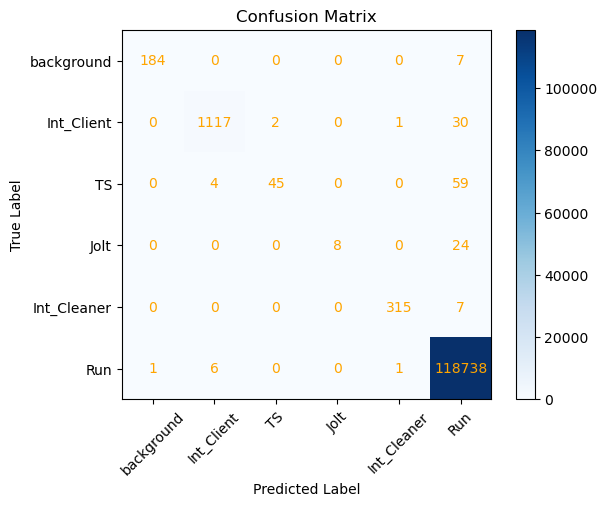

In [74]:
# Define the class labels
class_labels = merged_df['Interaction'].unique()

# Create the confusion matrix
cm = np.array([[184, 0, 0, 0, 0, 7],
               [0, 1117, 2, 0, 1, 30],
               [0, 4, 45, 0, 0, 59],
               [0, 0, 0, 8, 0, 24],
               [0, 0, 0, 0, 315, 7],
               [1, 6, 0, 0, 1, 118738]])

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

---
---
---
---

In [76]:
background_df = merged_df[merged_df['Interaction'] == 'background']
other_df = merged_df[merged_df['Interaction'] != 'background']

In [81]:
desired_background_samples = 5000

In [82]:
background_sample = background_df.sample(n=desired_background_samples, random_state=1999)

In [83]:
undersampled_df = pd.concat([background_sample, other_df], ignore_index=True)

In [84]:
interaction_counts_new = undersampled_df['Interaction'].value_counts()
print(interaction_counts_new)

Int_Client     5524
background     5000
TS             1474
Int_Cleaner     955
Jolt            490
Run             145
Name: Interaction, dtype: int64


In [85]:
X_new5000 = undersampled_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_new5000 = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [86]:
X_train_new5000, X_test_new5000, y_train_new5000, y_test_new5000 = train_test_split(X_new5000, y_new5000, test_size=0.2, random_state=1999)

In [87]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed_new5000 = imputer.fit_transform(X_train_new5000)
X_test_imputed_new5000 = imputer.transform(X_test_new5000)

In [88]:
model_new5000 = RandomForestClassifier()
model.fit(X_train_imputed_new5000, y_train_new5000)

RandomForestClassifier()

In [89]:
y_pred_new5000 = model.predict(X_test_imputed_new5000)
accuracy_new5000 = accuracy_score(y_test_new5000, y_pred_new5000)
print("Accuracy:", accuracy_new5000)

Accuracy: 0.9882266372332598


In [90]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000 = confusion_matrix(y_test_new5000, y_pred_new5000)

print(cm_new5000)

[[ 166    0    0    0    0    1]
 [   0 1088    2    0    0    0]
 [   2    5  104    0    0    2]
 [   0    1    0   23    0    4]
 [   0    0    0    0  301    0]
 [   0   11    1    0    3 1004]]


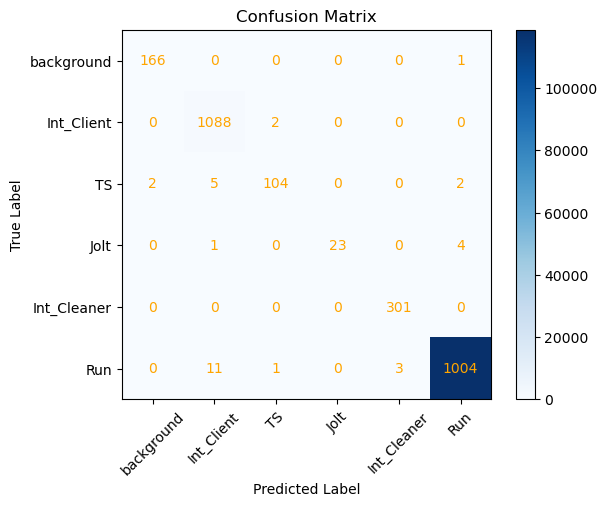

In [92]:
# Define the class labels
class_labels_new5000 = undersampled_df['Interaction'].unique()

# Create the confusion matrix
cm_new5000 = np.array(cm_new5000)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000)))
ax.set_yticks(np.arange(len(class_labels_new5000)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels_new5000)):
    for j in range(len(class_labels_new5000)):
        text = ax.text(j, i, cm_new5000[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

---
---
---
---